<a href="https://colab.research.google.com/github/RGithub23/Pandas-Showcase-USDA-Fruit-Prices/blob/main/pandas_showcase_usda_fruit_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Pandas Showcase — USDA Fruit Prices 2022

This Google Colab notebook demonstrates common **pandas** workflows using the USDA's
**Fruit Prices 2022 dataset** (public domain).

Dataset columns:
- **Fruit**: e.g., Apples, Bananas, Grapes
- **Form**: Fresh, canned, juice, frozen, etc.
- **RetailPrice**: Average retail price
- **RetailPriceUnit**: Unit basis (per pound, per pint, etc.)
- **Yield**: Fraction of edible portion
- **CupEquivalentSize**: Serving size (lbs or fluid ounces)
- **CupEquivalentUnit**: Unit type
- **CupEquivalentPrice**: Price per cup equivalent

We’ll explore the dataset with Pandas:
- Inspecting and cleaning
- Aggregating by fruit and form
- Price comparisons (fresh vs processed)
- Groupby and pivot tables
- Visualization of price distributions

Access to public dataset: https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices.

First one "All-Fruits - Average prices (CSV format). Can Download and upload later on.
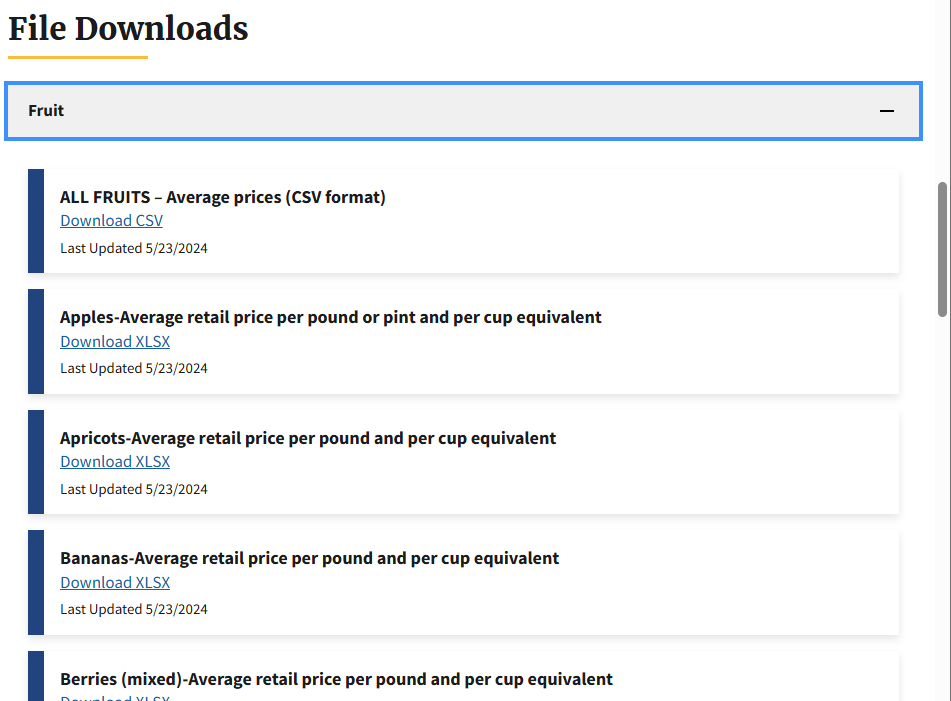



In [ ]:
#Importing libraries pandas as pd and matplotlib.pyplot as plt -For loading and analyzing tabular data - For plotting graphs later.
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
import io

# Upload button - Allows for dataset to be uploaded
uploaded = files.upload()

# Read the first uploaded file into a DataFrame
fname = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[fname]))

# Preview
df.head()
                                                                                #Shows the first few rows


Saving Fruit-Prices-2022 (1).csv to Fruit-Prices-2022 (1) (1).csv


,Fruit,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice
0,Apples,Fresh,1.8541,per pound,0.90,0.2425,pounds,0.4996
1,"Apples, applesauce",Canned,1.1705,per pound,1.00,0.5401,pounds,0.6323
2,"Apples, ready-to-drink",Juice,0.8699,per pint,1.00,8.0000,fluid ounces,0.4349
3,"Apples, frozen concentrate",Juice,0.6086,per pint,1.00,8.0000,fluid ounces,0.3043
4,Apricots,Fresh,3.6162,per pound,0.93,0.3638,pounds,1.4145


* This code block loads the USDA fruit price dataset into memory and prints the first 5 rows so you can start exploring it.





In [ ]:

df.info()
df.describe(include='all')


df.info()

* Prints a concise summary of the DataFrame:

* Number of rows & columns

* Column names

* Data types (int, float, object/string, etc.)

* How many non-null values each column has

* Helps spot missing data and check data types.

df.describe(include='all')

* Produces summary statistics for all columns:

* For numeric columns: mean, std, min, max, quartiles.

* For categorical/text columns: count, unique values, most frequent value (top), and its frequency.

* include='all' makes sure it covers both numeric and non-numeric columns.





In [ ]:

print("Unique fruits:", df['Fruit'].nunique())  # Counts the number of unique fruit types in the dataset.
print("Unique forms:", df['Form'].nunique())    # Counts the number of unique “forms” of fruit like fresh, frozen, juice, canned, dried.
df['Form'].value_counts()


Unique fruits: 53
Unique forms: 5


,count
Form,
Fresh,24
Canned,12
Juice,11
Dried,9
Frozen,6


In [ ]:

avg_price = df.groupby('Fruit', as_index=False)['RetailPrice'].mean().sort_values('RetailPrice', ascending=False)
avg_price.head(10)


Computing the average retail price per fruit type from your USDA dataset.


df.groupby('Fruit', as_index=False)

*  Groups the dataset by the Fruit column.

*  Example: all rows for "Apples" get grouped together, all rows for "Bananas", etc.

*  as_index=False means the result will keep "Fruit" as a column (instead of making it the index).


['RetailPrice'].mean()

* Within each fruit group, it calculates the average retail price.

* So you end up with one row per fruit + its mean price.

avg_price.head(10)

* Displays the first 10 rows of this grouped summary.

In [ ]:

pivot_fresh_processed = df.pivot_table(index='Fruit', columns='Form', values='RetailPrice', aggfunc='mean')
pivot_fresh_processed.head(10)


This code block is using a pivot table to compare fruit prices across different forms (fresh, frozen, juice, canned, etc.).

df.pivot_table(...)

* Creates a pivot table where:

* index='Fruit' - each row is a different fruit (Apples, Bananas, etc.).

* columns='Form' - creates separate columns for each form (Fresh, Juice, Frozen, etc.).

* values='RetailPrice' - fills the table with average retail prices.

* aggfunc='mean' - computes the mean price if multiple rows exist for the same fruit/form.

pivot_fresh_processed.head(10)

* Displays the first 10 rows of the pivot table.


In [ ]:

cup_price = df.groupby('Fruit', as_index=False)['CupEquivalentPrice'].mean().sort_values('CupEquivalentPrice')
cup_price.head(10)


This code block is computing the average price per edible cup equivalent for each fruit.

df.groupby('Fruit', as_index=False)

* Groups the dataset by fruit type (Apples, Bananas, Grapes, etc.).

   
['CupEquivalentPrice'].mean()

* Within each group, it calculates the average CupEquivalentPrice.

* CupEquivalentPrice = cost to consume one USDA-defined serving (like 1 cup of grapes, 1 medium apple, etc.).

cup_price.head(10)

* Displays the first 10 rows of this grouped summary.

In [ ]:

top15 = avg_price.head(15)
plt.figure(figsize=(8,5))
plt.barh(top15['Fruit'], top15['RetailPrice'])
plt.gca().invert_yaxis()
plt.title("Top 15 Fruits by Retail Price (2022 USDA)")
plt.xlabel("Price (per unit basis)")
plt.show()


This code block is creating a horizontal bar chart of the top 15 fruits by average retail price.


top15 = avg_price.head(15)

* Takes the first 15 fruits from the avg_price DataFrame (created earlier with groupby).

* Note: unless avg_price was sorted first, this will just give the first 15 fruits in alphabetical order, not necessarily the most or least expensive.

plt.figure(figsize=(8,5))

* Sets the figure size (8 inches wide × 5 inches tall).

plt.barh(top15['Fruit'], top15['RetailPrice'])

* Creates a horizontal bar chart with:

Y-axis = fruit names

X-axis = average retail price

plt.gca().invert_yaxis()

* Inverts the y-axis so the first fruit appears at the top instead of bottom.

Labels & title

* Title: "Top 15 Fruits by Retail Price (2022 USDA)"

X-axis label: "Price (per unit basis)".

plt.show()

Displays the chart.

In [ ]:

plt.figure(figsize=(8,5))
plt.hist(df['CupEquivalentPrice'], bins=15, edgecolor='black')
plt.title("Distribution of Cup Equivalent Prices")
plt.xlabel("Price per cup equivalent ($)")
plt.ylabel("Count")
plt.show()


This block is making a histogram of fruit prices (measured per cup equivalent).
  
plt.figure(figsize=(8,5))

* Sets the figure size to 8×5 inches.

plt.hist(df['CupEquivalentPrice'], bins=15, edgecolor='black')

* Creates a histogram of the CupEquivalentPrice column.

* bins=15 splits the price range into 15 intervals (price ranges).

* edgecolor='black' draws black borders around bars for clarity.

Title & labels

* Title: "Distribution of Cup Equivalent Prices"

* X-axis: "Price per cup equivalent ($)"

* Y-axis: "Count" (number of fruit entries in each price range).

plt.show()

* Displays the histogram.

In [ ]:

summary = {
    'rows': len(df),
    'unique_fruits': df['Fruit'].nunique(),
    'unique_forms': df['Form'].nunique(),
    'avg_price_overall': round(df['RetailPrice'].mean(), 2),
    'avg_cup_price': round(df['CupEquivalentPrice'].mean(), 2)
}
summary


This code block is creating a summary dictionary with key statistics about your USDA fruit dataset.

What it does

'rows': len(df)

*  Counts the total number of rows (entries) in the dataset.

'unique_fruits': df['Fruit'].nunique()

*  Counts the number of distinct fruit types (e.g., apples, bananas, grapes).

'unique_forms': df['Form'].nunique()

*  Counts the number of distinct fruit forms (fresh, juice, frozen, canned, etc.).

'avg_price_overall': round(df['RetailPrice'].mean(), 2)

*  Computes the average retail price per unit across all fruits.

Rounds to 2 decimal places.

'avg_cup_price': round(df['CupEquivalentPrice'].mean(), 2)

*  Computes the average price per USDA cup equivalent across all fruits.

*  Prints out the dictionary with all these summary stats.